In [1]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/final/GP_models')
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower')
import helper
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
import librosa
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import helper
import numpy as np
import seaborn as sns

In [3]:
def detected_samples(path='/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/beethoven.wav', sample_length=2000, offset=500, show=False, delta=0.05, num_samples=None, normalise=True):
    """
    Returns an array of numpy arrays for each detected onset note
    """
    sample_rate, data = wav.read(path)
    data = data.astype(np.float64) 
    if num_samples is not None:
        data = data[:num_samples]
    onset_times = librosa.onset.onset_detect(
        y=data, post_avg=5, wait=4,  sr=sample_rate, units='time', delta=delta)  # delta=0.15, wait=5, pre_avg=0, post_avg=5, pre_max=5, post_max=10,
    onset_numbers = onset_times * sample_rate

    sample_data = []
    for i in range(len(onset_numbers)):
        sample = data[int(onset_numbers[i]+offset):int(onset_numbers[i] + offset + sample_length)]
        if normalise is True:
            sample = helper.power_normalise(sample)/20
        sample_data.append(sample)
    if show is True:
        print("here")
        audio_duration = len(data)/sample_rate
        time_samples = np.linspace(0, audio_duration, len(data))
        helper.plot_audio(time_samples, data)
        for time in onset_times:
            plt.vlines(time + offset/sample_rate, ymin=-
                       25000, ymax=25000, colors='blue', zorder=2,linewidths=1)
            # plt.vlines(time + offset/sample_rate + sample_length /
            #            sample_rate, ymin=-25000, ymax=25000, colors='pink', zorder=2, linewidths=1)
    return sample_data, sample_rate, onset_times+500/44100


here


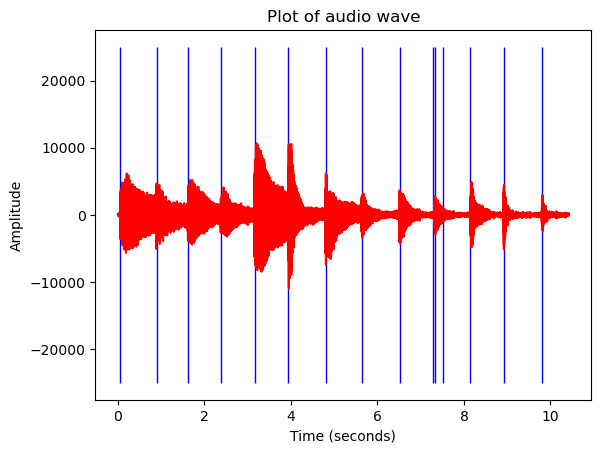

In [4]:
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/final/experiments/experiment_wav_files/circle_5ths.wav'
sample_rate, data = wav.read(wav_file)
# print(type(data))
sample_data, sample_rate, onset_times  = detected_samples(wav_file, sample_length=700, offset=0, show=True, delta=0.05,num_samples=1900000,normalise=False)
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))

In [5]:
indices = []
for i in range(len(onset_times)-1, 0, -1):
    diff = onset_times[i]-onset_times[i-1]
    if diff < 0.22:
        indices.append(i)

print(indices)

[11, 10]


In [6]:

sample_data = [element for index, element in enumerate(
    sample_data) if index not in indices]
print(len(sample_data))


13


In [7]:
M=9
T=0.465
v=2.37
notes = ["A0", "A#0", "B0", "C1", "C#1", "D1", "D#1", "E1", "F1", "F#1", "G1", "G#1", "A1", 
 "A#1", "B1", "C2", "C#2", "D2", "D#2", "E2", "F2", "F#2", "G2", "G#2", "A2",
 "A#2", "B2", "C3", "C#3", "D3", "D#3", "E3", "F3", "F#3", "G3", "G#3", "A3",
 "A#3", "B3", "C4", "C#4", "D4", "D#4", "E4", "F4", "F#4", "G4", "G#4", "A4",
 "A#4", "B4", "C5", "C#5", "D5", "D#5", "E5", "F5", "F#5", "G5", "G#5", "A5",
 "A#5", "B5", "C6", "C#6", "D6", "D#6", "E6", "F6", "F#6", "G6", "G#6", "A6",
 "A#6", "B6", "C7", "C#7", "D7", "D#7", "E7", "F7", "F#7", "G7", "G#7", "A7",
 "A#7", "B7", "C8"]

sigma=1/500000

f_base = 27.5
frequencies = [f_base * (2 ** (1/12)) ** i for i in range(len(sample_data))]

In [8]:
# Frequency calculation for circles of fifths starting from 27.5 Hz


# Prepare to store the results
M_values = range(1, 16)  # M from 1 to 15
results = np.zeros((len(M_values), len(sample_data)))

# Compute LMLs for each combination of M and sample_data index
for i, M in enumerate(M_values):
    for j in range(len(sample_data)):
        results[i, j] = -helper.stable_nlml(time_samples, sample_data[j], M=M,  f=[frequencies[j]], T=T, v=v)


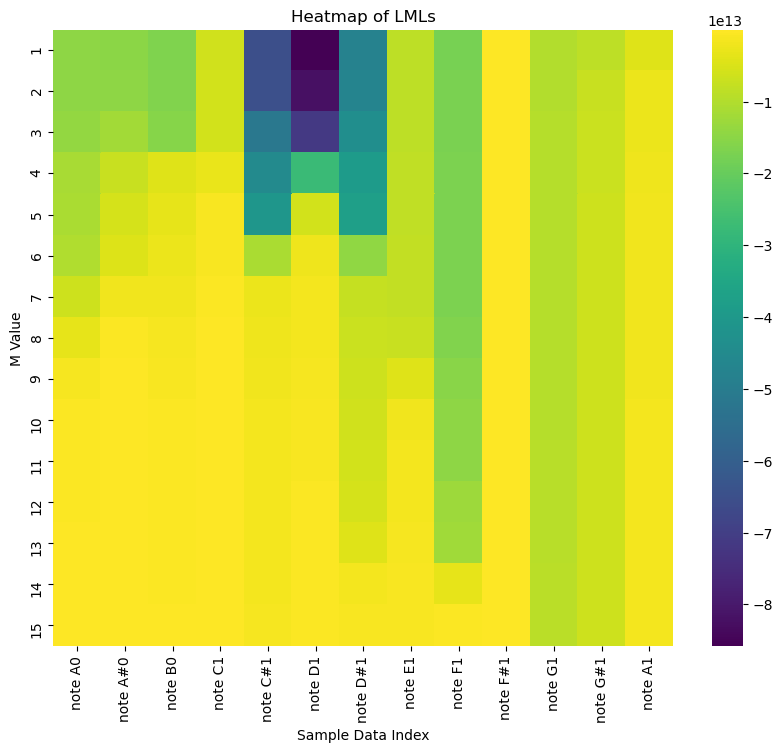

In [9]:

# Plotting the heatmap without annotations
plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=False, cmap="viridis", xticklabels=[f"note {notes[i]}" for i in range(len(sample_data))], yticklabels=M_values)
plt.title("Heatmap of LMLs")
plt.xlabel("Sample Data Index")
plt.ylabel("M Value")
plt.show()

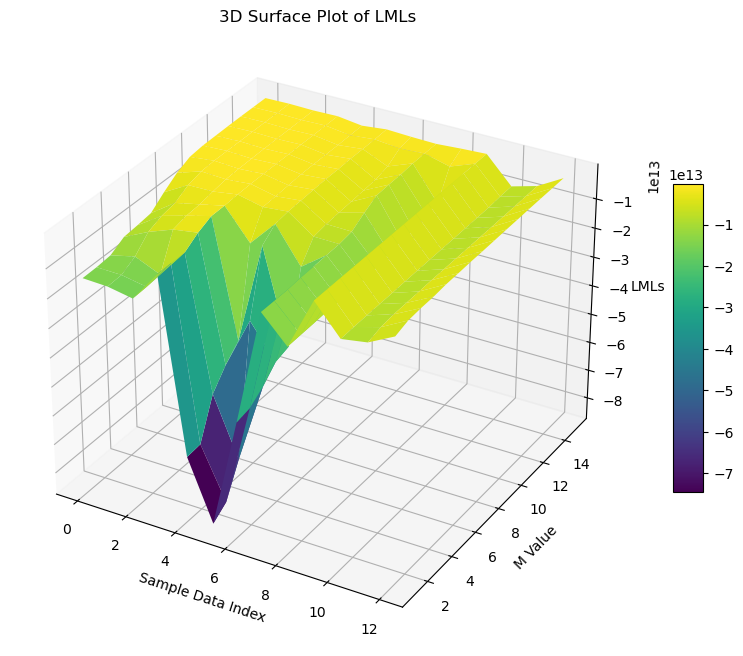

In [10]:

# Sample data setup (assuming 'results' is already computed)
M_values = np.arange(1, 16)  # M from 1 to 15
sample_data_indices = np.arange(len(sample_data))  # Indices of your sample data

# Create meshgrid
X, Y = np.meshgrid(sample_data_indices, M_values)

# Set up a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, results, cmap='viridis')

# Labels and title
ax.set_xlabel('Sample Data Index')
ax.set_ylabel('M Value')
ax.set_zlabel('LMLs')
ax.set_title('3D Surface Plot of LMLs')

# Color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Show the plot
plt.show()

here


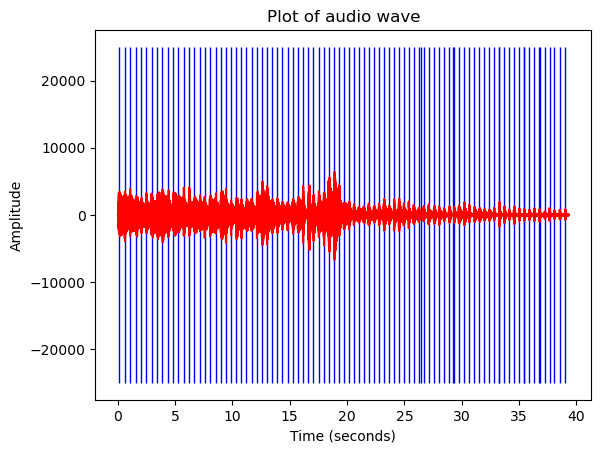

In [16]:
wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/final/experiments/experiment_wav_files/chromatic.wav'
sample_rate, data = wav.read(wav_file)
# print(type(data))
sample_data, sample_rate, onset_times  = detected_samples(wav_file, sample_length=700, offset=0, show=True, delta=0.05,num_samples=1900000,normalise=False)
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))

In [17]:
f_base = 27.5
frequencies = [f_base * (2 ** (1/12)) ** i for i in range(len(sample_data))]

In [20]:
indices = []
for i in range(len(onset_times)-1, 0, -1):
    diff = onset_times[i]-onset_times[i-1]
    if diff < 0.22:
        indices.append(i)

print(indices)

[87, 83, 77, 67, 59]


In [22]:

sample_data = [element for index, element in enumerate(
    sample_data) if index not in indices]
print(len(sample_data))


88


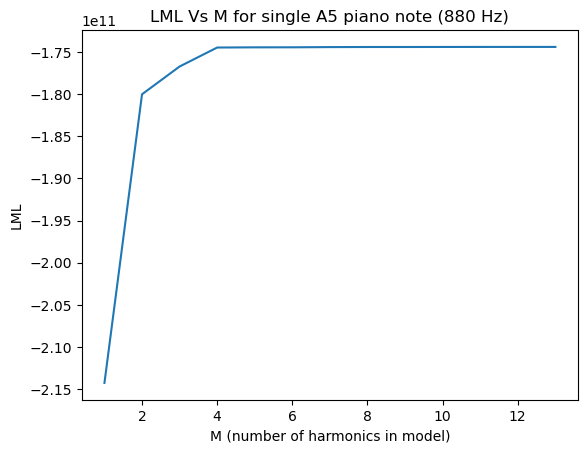

In [23]:
# Now looking at one frequency:
n = 60
data = sample_data[n]
LMLs = []
Ms = np.arange(1, 14, 1)
for m in Ms:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=m, sigma_f=sigma, f=[frequencies[n]], T=T, v=v))

plt.title("LML Vs M for single A5 piano note (880 Hz)")
plt.xlabel("M (number of harmonics in model)")
plt.ylabel("LML")
plt.plot( Ms,LMLs)
plt.show()

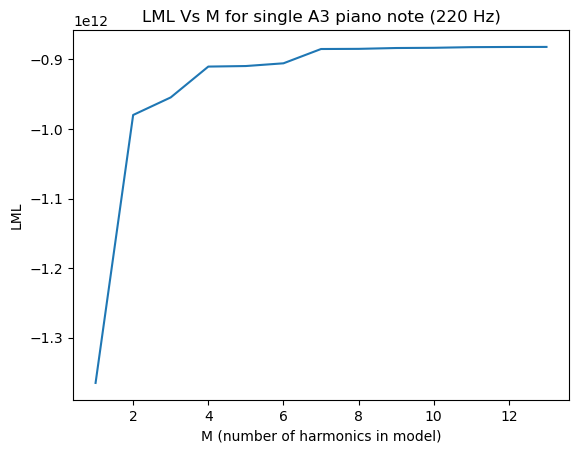

In [24]:
# Now looking at one frequency:
n = 36
data = sample_data[n]
LMLs = []
Ms = np.arange(1, 14, 1)
for m in Ms:
    LMLs.append(-helper.stable_nlml(time_samples,data, M=m, sigma_f=sigma, f=[frequencies[n]], T=T, v=v))

plt.title("LML Vs M for single A3 piano note (220 Hz)")
plt.xlabel("M (number of harmonics in model)")
plt.ylabel("LML")
plt.plot( Ms,LMLs)
plt.show()
